# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Replaced space with %20
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Setup for the weather API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# units
units = "imperial"

#Create lists to store response info

City_Name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []


#Create print log of each city as it's being processed 

print("Beginning Data Retrieval")
print ("-------------------------------")

city_count = 0

for city in cities: 

    # Build query URL
    query_url = base_url + "appid=" + api_key + "&units=" + units + "&q=" + city
    weather_data = requests.get(query_url).json()
    
    city_count += 1
    print(f"Processing Record {city_count} | {city}")
    
    #print query urls for each city to QC result
    print(f"{query_url}")
    
    #Kept exceeding API call limit per minute and getting OpenWeather account blocked. This adds a second in the loop to not exceed call limit of API
    time.sleep(1) 
    
    try:
        City_Name.append(weather_data['name'])
        Cloudiness.append(weather_data['clouds']['all'])
        Country.append(weather_data['sys']['country'])
        Date.append(weather_data['dt'])
        Humidity.append(weather_data['main']['humidity'])
        Lat.append(weather_data['coord']['lat'])
        Lng.append(weather_data['coord']['lon'])
        Max_Temp.append(weather_data['main']['temp_max'])
        Wind_Speed.append(weather_data['wind']['speed'])

    except:
        print("City not found. Skipping...")


print('--------------------------------')
print('Data Retrieval Complete')
print('--------------------------------')
        


Beginning Data Retrieval
-------------------------------
Processing Record 1 | gimli
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=gimli
Processing Record 2 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=vardo
Processing Record 3 | cape%20town
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=cape%20town
Processing Record 4 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=dingle
Processing Record 5 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=severo-kurilsk
Processing Record 6 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=vaini
Processing Record 7 | deoli
http://api.openweathermap.org/data/2.5/weather?appid=f4009daa

Processing Record 56 | east%20london
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=east%20london
Processing Record 57 | antigonish
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=antigonish
Processing Record 58 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=hithadhoo
Processing Record 59 | grand%20river%20south%20east
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=grand%20river%20south%20east
City not found. Skipping...
Processing Record 60 | pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=pangkalanbuun
Processing Record 61 | nidzica
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=nidzica
Processing Record 62 | touros
http://api.ope

City not found. Skipping...
Processing Record 112 | mizdah
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=mizdah
Processing Record 113 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=chokurdakh
Processing Record 114 | ponta%20do%20sol
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=ponta%20do%20sol
Processing Record 115 | muscat
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=muscat
Processing Record 116 | north%20bend
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=north%20bend
Processing Record 117 | margate
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=margate
Processing Record 118 | souillac
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 167 | coos%20bay
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=coos%20bay
Processing Record 168 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=nikolskoye
Processing Record 169 | meinung
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=meinung
City not found. Skipping...
Processing Record 170 | bambous%20virieux
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=bambous%20virieux
Processing Record 171 | ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=ketchikan
Processing Record 172 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=narsaq
Processing Record 173 | khatanga
http://api.openweathermap.org/data/2.5/weather?

Processing Record 222 | kununurra
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=kununurra
Processing Record 223 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=derzhavinsk
Processing Record 224 | sola
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=sola
Processing Record 225 | mazatlan
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=mazatlan
Processing Record 226 | lewisporte
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=lewisporte
Processing Record 227 | ouesso
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=ouesso
Processing Record 228 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=i

Processing Record 278 | umm%20kaddadah
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=umm%20kaddadah
Processing Record 279 | lufilufi
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=lufilufi
Processing Record 280 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=lagoa
Processing Record 281 | tefe
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=tefe
Processing Record 282 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=mayo
Processing Record 283 | duz
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=duz
City not found. Skipping...
Processing Record 284 | mulege
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units

Processing Record 333 | soyo
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=soyo
Processing Record 334 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=ancud
Processing Record 335 | bone
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=bone
Processing Record 336 | mwinilunga
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=mwinilunga
Processing Record 337 | chapais
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=chapais
Processing Record 338 | bauchi
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=bauchi
Processing Record 339 | castro
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=castro
Processing Re

Processing Record 389 | la%20rioja
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=la%20rioja
Processing Record 390 | batagay
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=batagay
Processing Record 391 | arhus
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=arhus
Processing Record 392 | port%20macquarie
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=port%20macquarie
Processing Record 393 | puerto%20madero
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=puerto%20madero
Processing Record 394 | monrovia
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=monrovia
Processing Record 395 | honiara
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f

Processing Record 444 | saint-louis
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=saint-louis
Processing Record 445 | teguldet
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=teguldet
Processing Record 446 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=saint-pierre
Processing Record 447 | tateyama
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=tateyama
Processing Record 448 | magadi
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=magadi
Processing Record 449 | liloy
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=liloy
Processing Record 450 | shenkursk
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=

City not found. Skipping...
Processing Record 500 | jaramana
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=jaramana
City not found. Skipping...
Processing Record 501 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=tuatapere
Processing Record 502 | berlevag
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=berlevag
Processing Record 503 | shubarkuduk
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=shubarkuduk
Processing Record 504 | tignere
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=tignere
Processing Record 505 | sao%20joao%20da%20barra
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=sao%20joao%20da%20barra
Processing Record 506 | prince%20ruper

Processing Record 555 | kiruna
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=kiruna
Processing Record 556 | casa%20nova
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=casa%20nova
Processing Record 557 | port%20hardy
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=port%20hardy
Processing Record 558 | male
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=male
Processing Record 559 | tezu
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=tezu
Processing Record 560 | kota%20tinggi
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imperial&q=kota%20tinggi
Processing Record 561 | darhan
http://api.openweathermap.org/data/2.5/weather?appid=f4009daaa920691b52f514cc76575a95&units=imp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#Create Data Frame 
weather_df = pd.DataFrame({
    'City Name': City_Name,
    'Cloudiness': Cloudiness,
    'Country': Country,
    'Date': Date,
    'Humidity': Humidity,
    'Lat': Lat,
    'Lng': Lng,
    'Max Temp': Max_Temp,
    'Wind Speed': Wind_Speed
})

weather_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gimli,28,CA,1578375218,75,50.63,-96.99,19.99,18.01
1,Vardo,1,US,1578374845,41,39.62,-77.74,39.20,4.70
2,Cape Town,96,ZA,1578374726,64,-33.93,18.42,70.00,5.82
3,Dingle,71,PH,1578374848,82,11.00,122.67,80.15,10.51
4,Severo-Kurilsk,100,RU,1578375223,78,50.68,156.12,22.03,14.85


In [16]:
#Count data rows in each field to check for record completness
weather_df.count()

City Name     543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [20]:
#Export data into csv 
weather_df.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

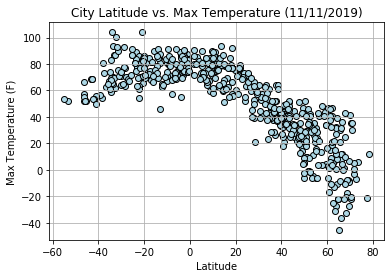

In [23]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], facecolors='lightblue', edgecolors='black')
plt.title('City Latitude vs. Max Temperature (11/11/2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('output_data/Latitude_vs_Max_Temp.png')

#### Latitude vs. Humidity Plot

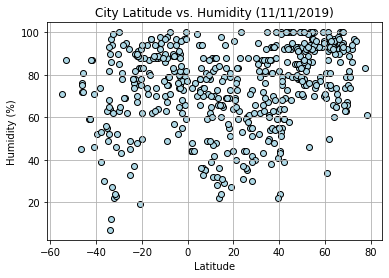

In [24]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], facecolors='lightblue', edgecolors='black')
plt.title('City Latitude vs. Humidity (11/11/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('output_data/Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

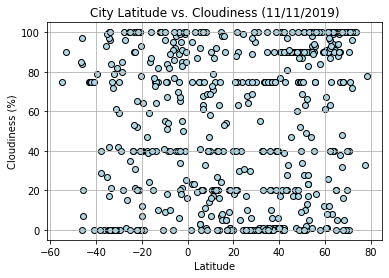

In [25]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], facecolors='lightblue', edgecolors='black')
plt.title('City Latitude vs. Cloudiness (11/11/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('output_data/Latitude_vs_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

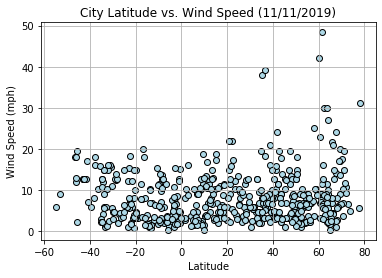

In [26]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], facecolors='lightblue', edgecolors='black')
plt.title('City Latitude vs. Wind Speed (11/11/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('output_data/Latitude_vs_Wind_Speed.png')